# Project Summary
Basicly, the life expectancy is the expected number of years to live by a person. By wikipedia, formal definitiof of the life expectancy as follows Life  a statistical measure of the average time an organism is expected to live, based on the year of its birth, its current age, and other demographic factors including sex.  <br />
The technological enhancements led to increase life expectancy globally more than doubled. Yet, this can be further divided into "healthy life expectancy" and "years lived with disability". Comprehension life expactancy of disabled individual can aid further understanding the group of people affected by the increase in life expectancy. 

Examining the change in life expectancy splited into smaller periods(yearly span) can show more detailed information on what exactly led to this raise.<br />

The dataset in this project is gathered from the Institute of Health Metrics and Evaluation. Healthy Life Expectancy" and "Years Lived With Disability" by countries and years(1990-2019)  with no missing or ill-formatted entries is contained in the dataset.

 # Exploring the Data
 An exploration of the dataset will determine the following: <br />
1.number of rows and countries. <br />
2.box plot for global healthy life expectancy vs years lived with disability by year.<br />
3.bar plot for the global mean, min and max healthy life expectancy vs years lived with disability by year

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [76]:
data = pd.read_csv("life-expectancy-vs-expected-years-lived-with-disability.csv")

In [77]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56515 entries, 0 to 56514
Data columns (total 7 columns):
Entity                                     56515 non-null object
Code                                       54079 non-null object
Year                                       56515 non-null int64
Life Expectancy (IHME)                     6102 non-null float64
Years Lived With Disability (IHME)         6102 non-null float64
Total population (Gapminder, HYDE & UN)    55656 non-null float64
Continent                                  285 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 3.0+ MB


In [78]:
data = data.drop(['Code','Total population (Gapminder, HYDE & UN)', 'Continent'],  axis = 1)

In [79]:
data = data.rename(columns={'Entity':'Country', 
'Life Expectancy (IHME)':'Healthy Life Expectancy',
'Years Lived With Disability (IHME)':'Years Lived With Disability'})

In [80]:
data = data[(pd.isnull(data['Country'])==False)&(pd.isnull(data['Healthy Life Expectancy'])==False)&
     (pd.isnull(data['Years Lived With Disability'])==False)]

In [81]:
data = data.drop_duplicates()

In [82]:
print('Number of rows: '+str(data.shape[0]))
print('Column names: '+str(data.columns.tolist()))
print('Number of countries: '+str(len(data['Country'].unique())))
print('Number of missing values: \n' + str(data.isnull().sum()))

Number of rows: 6102
Column names: ['Country', 'Year', 'Healthy Life Expectancy', 'Years Lived With Disability']
Number of countries: 226
Number of missing values: 
Country                        0
Year                           0
Healthy Life Expectancy        0
Years Lived With Disability    0
dtype: int64


In [83]:
#In order to get the global mean/min/max for that year we are taking the average/min/max via grouping by year
df = data.groupby('Year')['Healthy Life Expectancy'].agg(['mean', 'min', 'max'])

[Text(0, 0.5, 'Healthy Life Expectancy in Years'), Text(0.5, 0, 'Year')]

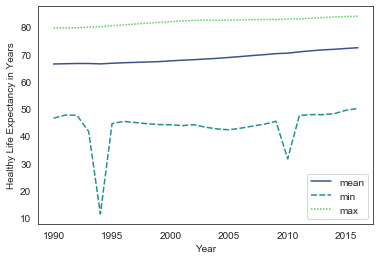

In [84]:
ax = sns.lineplot(data=df, palette="viridis")
ax.set(xlabel='Year', ylabel='Healthy Life Expectancy in Years')

In [86]:
df2 = data.groupby('Year')['Years Lived With Disability'].agg(['mean', 'min', 'max'])

[Text(0, 0.5, 'Years Lived With Disability'), Text(0.5, 0, 'Year')]

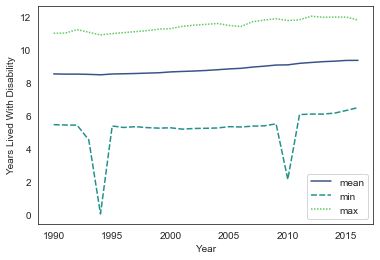

In [87]:
ax2 = sns.lineplot(data=df2, palette="viridis")
ax2.set(xlabel='Year', ylabel='Years Lived With Disability')

In [88]:
x=data['Year'].unique()
mean_hle = np.array(data.groupby('Year')['Healthy Life Expectancy'].agg(['mean'])).flatten()
mean_ylwd = np.array(data.groupby('Year')['Years Lived With Disability'].agg(['mean'])).flatten()
y=[ mean_hle, mean_ylwd ]

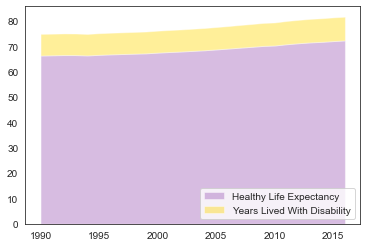

In [89]:
f = plt.figure(figsize=(6,4))
palette = sns.color_palette(["#9b59b6", "#ffd700"])
plt.stackplot(x, y, labels=['Healthy Life Expectancy', 'Years Lived With Disability'], colors=palette, alpha=0.4 )
plt.legend(loc='lower right')

In [90]:
df_hle = data.groupby('Year')['Healthy Life Expectancy'].apply(lambda data: data.reset_index(drop=True)).unstack().T
df_ylwd = data.groupby('Year')['Years Lived With Disability'].apply(lambda data: data.reset_index(drop=True)).unstack().T

[Text(0, 0.5, 'Healthy Life Expectancy'), Text(0.5, 0, 'Year')]

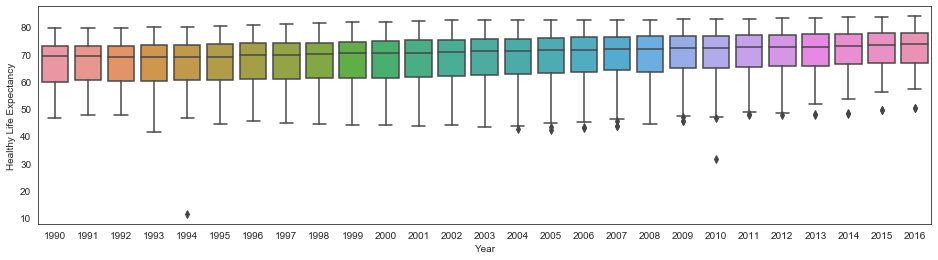

In [91]:
sns.set_style('white')
sns.set_palette('dark')

f = plt.figure(figsize=(16,4))
ax = sns.boxplot(data=df_hle);
ax.set(xlabel="Year", ylabel = "Healthy Life Expectancy")

[Text(0, 0.5, 'Years Lived With Disability'), Text(0.5, 0, 'Year')]

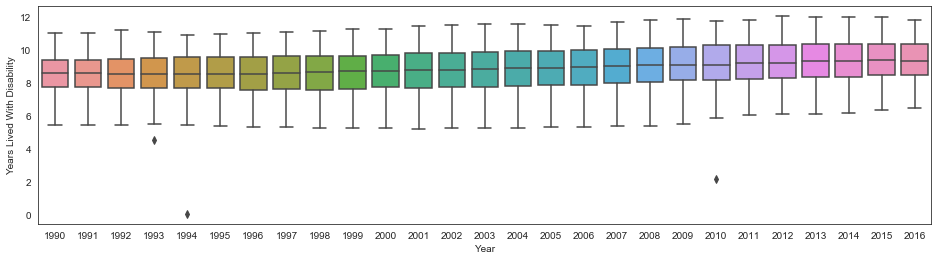

In [92]:
f = plt.figure(figsize=(16,4))
ax2 = sns.boxplot(data=df_ylwd);
ax2.set(xlabel="Year", ylabel = "Years Lived With Disability")

# Feature Engineering and Data Preparation 
* The new feature called as Global Change which is change from previous and current years is obtained.
* Plot global change (mean based) by year.
* Plot the change by year per country

In [93]:
def has_previous(row, row_shift):
    if np.isnan(row_shift.all()):
        return '0'
    else:
        return row-row_shift

In [94]:
def add_global_change_feature(data, category):
    '''Derives new feature 'Change' from previous and current years '''
    
    # compute change from current and previous for each feature value
    change = data.apply(lambda x: has_previous(x, x.shift(1)))
    # first year has no previous year to be compared to
    change[category][2000] = 0
        
    # add to data as new feature
    data['Change ' + category] = change[category]

In [95]:
# global Healthy Life Expectancy groupped by year
hle_data = data.groupby('Year')['Healthy Life Expectancy'].agg(['mean'])
add_global_change_feature(hle_data, 'mean')
# global Years Lived With Disability groupped by year
ylwd_data = data.groupby('Year')['Years Lived With Disability'].agg(['mean'])
add_global_change_feature(ylwd_data, 'mean')


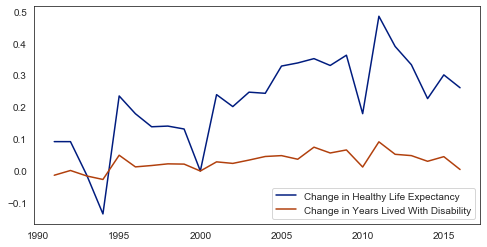

In [96]:
f = plt.figure(figsize=(8,4))
plt.plot(hle_data['Change mean'], label='Change in Healthy Life Expectancy')
plt.plot(ylwd_data['Change mean'], label='Change in Years Lived With Disability')
plt.legend(loc='lower right')

# Hypothesis testing
The deduction from above plot proposes that there is a continuous increase in both healthy life expectancy and years lived with disability.<br />
**Hypothesis:** Assume that there is a corelation between the increase life expectancy and years lived with disability which means that they have same mean change globally.<br />
**Alternative Hypothesis:** There is no corelation between the change rate of increase in years lived with disability and healthy life expectancy.<br />
Implementing a t-test to question our Hypothesis.

In [108]:
hle = np.array(hle_data.loc[2000:2006]['Change mean'])

In [109]:
ylwd = np.array(ylwd_data.loc[2006:2011]['Change mean'])


In [110]:
stats.ttest_ind(hle, ylwd, equal_var = False)

Ttest_indResult(statistic=3.9103232261466756, pvalue=0.006047390366176906)

# Results
The test Result of p value is 0.006047390366176906 which is less than 0.005. Hence the null hypothesis at 5% significance level is rejected. This means there is not relation between the increase life expectancy and years lived with disability. 
